In [1]:
from simulator.bb84 import simulation_bb84
from tqdm import tqdm
from numpy import arange
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import genetic_algorithm.genetic_algorithm

# Preliminary tests without optimisation

In [12]:
# Create an empty list to store the dictionaries
results_list = []

for i in range(20):
    
    for qber in tqdm(arange(start=0.01, stop=0.16, step=0.01)):
        simulation_results = simulation_bb84(
            alice_basis_length=10000,
            disturbance_probability=qber,
            cascade_n_passes=4
        )
        
        # Append the results as a new dictionary to the list
        new_row = {
            'qber': qber,
            'final error rate': simulation_results.get('error rate'),
            'error estimate': simulation_results.get('error estimate'),
            'initial key length': simulation_results.get('key length history').get('qubits'),
            'key length after sifting': simulation_results.get('key length history').get('sifting'),
            'key length after err est': simulation_results.get('key length history').get('error estimation'),
            'key length after err corr': simulation_results.get('key length history').get('error correction')
        }
        results_list.append(new_row)

# Create a DataFrame from the list of dictionaries
results_df = pd.DataFrame(results_list)

100%|██████████| 15/15 [00:03<00:00,  4.94it/s]


In [13]:
results_df.sample(10)

,qber,final error rate,error estimate,initial key length,key length after sifting,key length after err est,key length after err corr
163,0.14,0.031873,0.096534,10000,5013,4018,1004
274,0.05,0.009407,0.032589,10000,5104,4122,1382
152,0.03,0.002825,0.013391,10000,5016,4039,2832
70,0.11,0.021472,0.062788,10000,4949,3914,978
225,0.01,0.002401,0.008138,10000,5031,4048,2916
87,0.13,0.027833,0.081660,10000,4994,4026,1006
226,0.02,0.002745,0.009978,10000,4954,3946,2550
194,0.15,0.024586,0.093390,10000,4962,3987,1993
78,0.04,0.004508,0.023939,10000,4951,3946,2662
113,0.09,0.010811,0.066046,10000,5011,3987,2035


Plotting results:

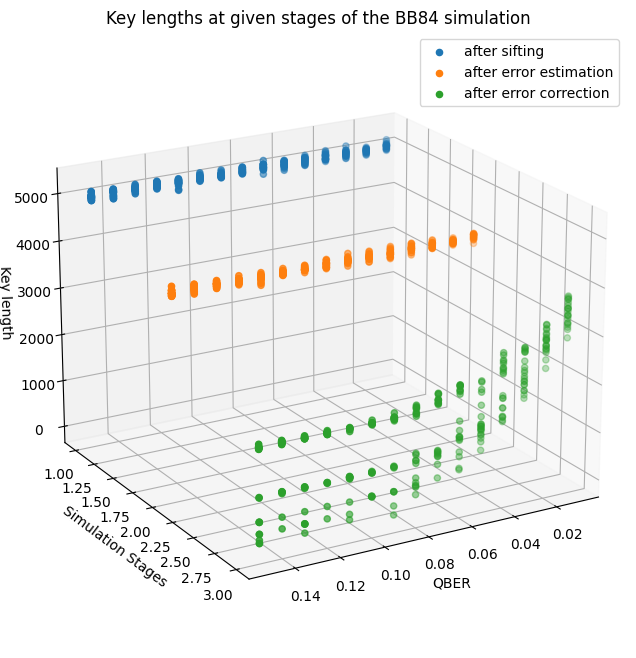

In [21]:
# Create a 3D scatter plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Prepare data for scatter plot
initial_params = results_df['qber']
stages = np.arange(1, 4)  # Assuming there are three stages in the simulation

# Scatter plot for Variable_1
ax.scatter(
    initial_params, 
    np.full_like(initial_params, 1), 
    results_df['key length after sifting'], 
    label='after sifting'
)

# Scatter plot for Variable_2
ax.scatter(
    initial_params, 
    np.full_like(initial_params, 2), 
    results_df['key length after err est'], 
    label='after error estimation'
)

# Scatter plot for Variable_3
ax.scatter(
    initial_params, 
    np.full_like(initial_params, 3), 
    results_df['key length after err corr'], 
    label='after error correction'
)

# Set labels for axes
ax.set_xlabel('QBER')
ax.set_ylabel('Simulation Stages')
ax.set_zlabel('Key length')

# Set plot title
plt.title('Key lengths at given stages of the BB84 simulation')

# Set the viewing point
ax.view_init(elev=20, azim=60)  # Adjust these values to change the viewing point

# Show the legend
ax.legend()

# Show the plot
plt.show()

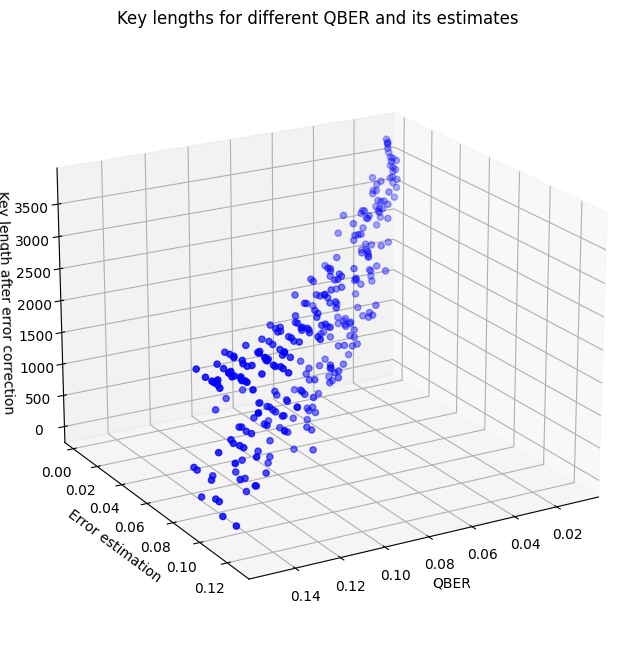

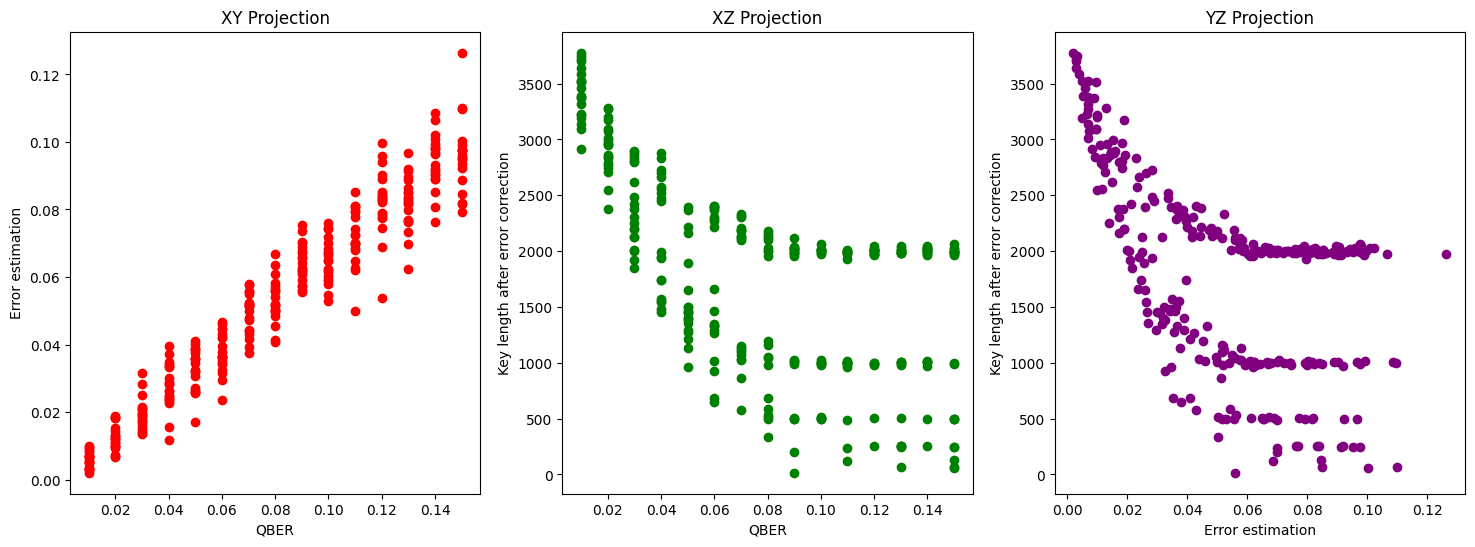

In [31]:
# Create a 3D scatter plot
fig = plt.figure(figsize=(12, 8))
ax_3d = fig.add_subplot(111, projection='3d')

# Plot the 3D scatter plot
ax_3d.scatter(results_df['qber'], results_df['error estimate'], results_df['key length after err corr'], c='blue', label='3D scatter')

# Set labels for axes
ax_3d.set_xlabel('QBER')
ax_3d.set_ylabel('Error estimation')
ax_3d.set_zlabel('Key length after error correction')

# Set plot title
plt.title('Key lengths for different QBER and its estimates')

# Set the viewing point
ax_3d.view_init(elev=20, azim=60)  # Adjust these values to change the viewing point

# Plot projections on XY, XZ, and YZ planes
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# XY projection
axes[0].scatter(results_df['qber'], results_df['error estimate'], c='red', label='XY projection')
axes[0].set_xlabel('QBER')
axes[0].set_ylabel('Error estimation')
axes[0].set_title('XY Projection')

# XZ projection
axes[1].scatter(results_df['qber'], results_df['key length after err corr'], c='green', label='XZ projection')
axes[1].set_xlabel('QBER')
axes[1].set_ylabel('Key length after error correction')
axes[1].set_title('XZ Projection')

# YZ projection
axes[2].scatter(results_df['error estimate'], results_df['key length after err corr'], c='purple', label='YZ projection')
axes[2].set_xlabel('Error estimation')
axes[2].set_ylabel('Key length after error correction')
axes[2].set_title('YZ Projection')

# Show the plots
plt.show()

In [37]:
results_df.to_csv("new_results.csv")

# Simulation with no error estimation, just as in the '93 paper

In [11]:
# Create an empty list to store the dictionaries
results93_list = []

for i in range(20):
    
    for qber in tqdm(arange(start=0.01, stop=0.16, step=0.01)):
        simulation_results = simulation_bb84(
            alice_basis_length=10000,
            disturbance_probability=qber,
            cascade_n_passes=4,
            error_estimation='none'
        )
        
        # Append the results as a new dictionary to the list
        new_row = {
            'qber': qber,
            'final error rate': simulation_results.get('error rate'),
            'error estimate': simulation_results.get('error estimate'),
            'initial key length': simulation_results.get('key length history').get('qubits'),
            'key length after sifting': simulation_results.get('key length history').get('sifting'),
            'key length after err est': simulation_results.get('key length history').get('error estimation'),
            'key length after err corr': simulation_results.get('key length history').get('error correction'),
            'no. cascade pass.': simulation_results.get('key length history').get('no. cascade pass.')
        }
        results93_list.append(new_row)

# Create a DataFrame from the list of dictionaries
results93_df = pd.DataFrame(results93_list)

100%|██████████| 15/15 [00:02<00:00,  5.91it/s]


In [12]:
results93_df.sample(10)

,qber,final error rate,error estimate,initial key length,key length after sifting,key length after err est,key length after err corr,no. cascade pass.
182,0.03,0.004937,0.03,10000,5075,5075,2836,None
212,0.03,0.005429,0.03,10000,4973,4973,2763,None
232,0.08,0.019576,0.08,10000,4905,4905,2452,None
6,0.07,0.017432,0.07,10000,4956,4956,2811,None
140,0.06,0.021117,0.06,10000,5029,5029,1468,None
19,0.05,0.014180,0.05,10000,5104,5104,1622,None
275,0.06,0.011994,0.06,10000,5017,5017,1334,None
46,0.02,0.006250,0.02,10000,4965,4965,3040,None
227,0.03,0.009852,0.03,10000,5026,5026,2030,None
3,0.04,0.006322,0.04,10000,4954,4954,2531,None


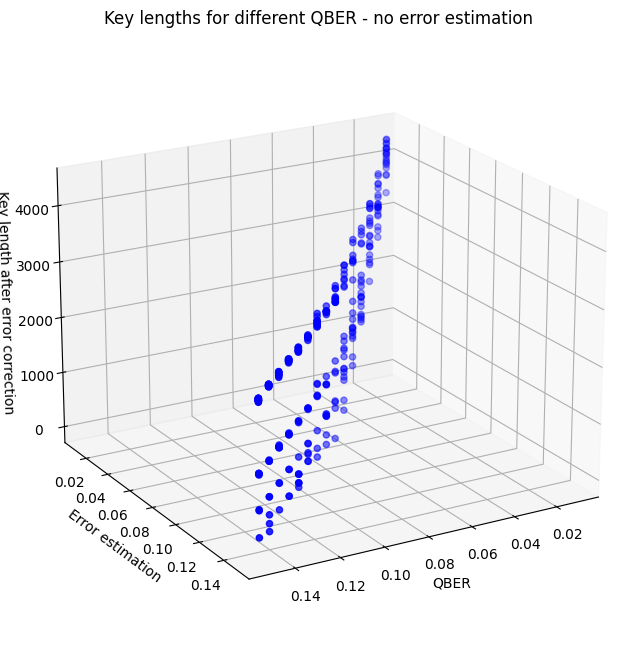

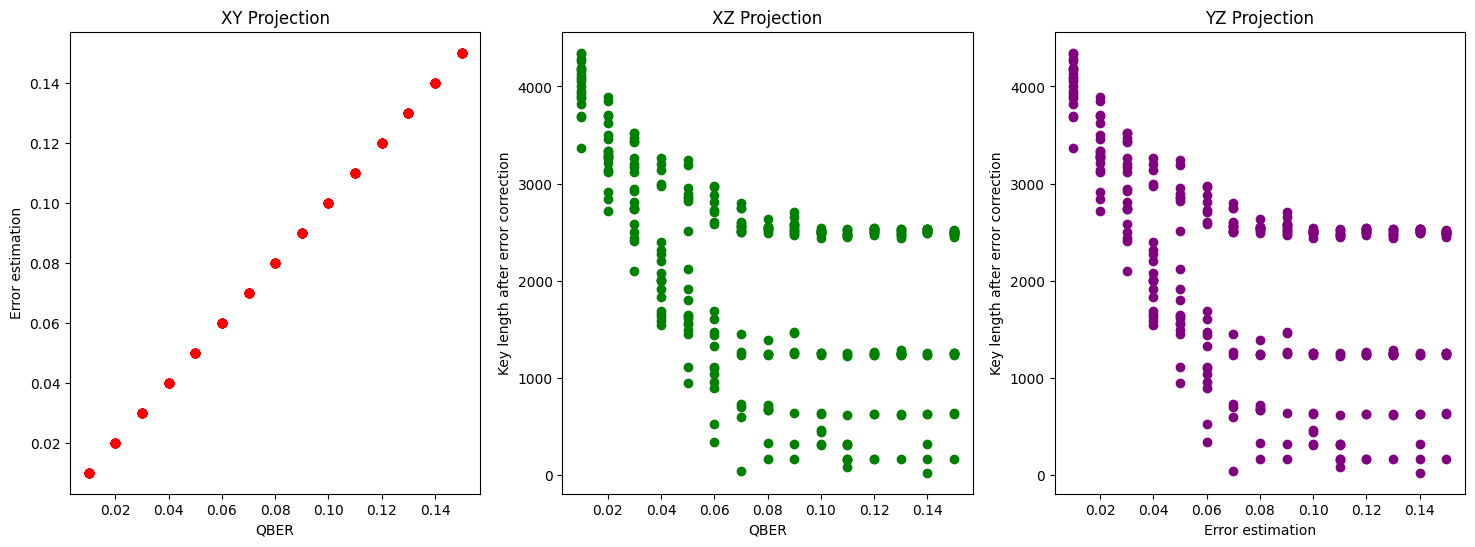

In [7]:
# Create a 3D scatter plot
fig = plt.figure(figsize=(12, 8))
ax_3d = fig.add_subplot(111, projection='3d')

# Plot the 3D scatter plot
ax_3d.scatter(results93_df['qber'], results93_df['error estimate'], results93_df['key length after err corr'], c='blue', label='3D scatter')

# Set labels for axes
ax_3d.set_xlabel('QBER')
ax_3d.set_ylabel('Error estimation')
ax_3d.set_zlabel('Key length after error correction')

# Set plot title
plt.title('Key lengths for different QBER - no error estimation')

# Set the viewing point
ax_3d.view_init(elev=20, azim=60)  # Adjust these values to change the viewing point

# Plot projections on XY, XZ, and YZ planes
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# XY projection
axes[0].scatter(results93_df['qber'], results93_df['error estimate'], c='red', label='XY projection')
axes[0].set_xlabel('QBER')
axes[0].set_ylabel('Error estimation')
axes[0].set_title('XY Projection')

# XZ projection
axes[1].scatter(results93_df['qber'], results93_df['key length after err corr'], c='green', label='XZ projection')
axes[1].set_xlabel('QBER')
axes[1].set_ylabel('Key length after error correction')
axes[1].set_title('XZ Projection')

# YZ projection
axes[2].scatter(results93_df['error estimate'], results93_df['key length after err corr'], c='purple', label='YZ projection')
axes[2].set_xlabel('Error estimation')
axes[2].set_ylabel('Key length after error correction')
axes[2].set_title('YZ Projection')

# Show the plots
plt.show()

Perhaps it depends on whether all 4 CASCADE passes were done? What's the final error rate?

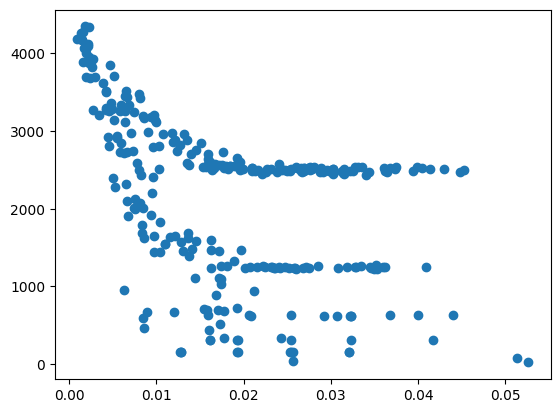

In [8]:
plt.scatter(results93_df['final error rate'], results93_df['key length after err corr'])

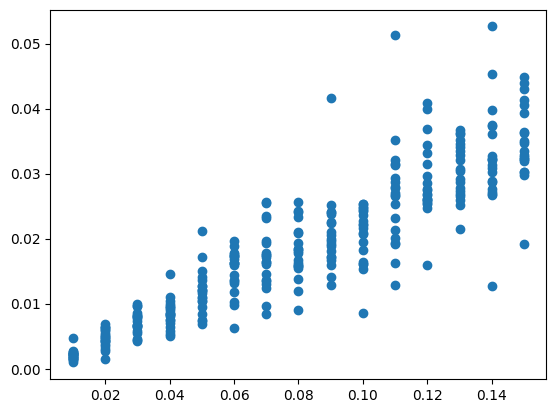

In [10]:
plt.scatter(results93_df['qber'], results93_df['final error rate'])

In [ ]:
plt.scatter(results93_df['no. cascade pass'], results93_df['key length after err corr'])

# Optimisation with a classical genetic algorithm

In [ ]:
gene_space = [0, 1, 2, 3, 4]
num_generations = 100
population_size = 50
elite_size = 2

In [ ]:
def genome_generator(args):
    """Function for randomising BB84 input parameters"""
    
    return genome